# **NATURAL LANGUAGE PROCESSING**

**Natural Language Processing and Machine Learning make it possible to build robust models with the storage capacity and processing power available to us today. Natural Language Processing concepts deal with processing human langauge while discovering patterns, relationships and, semantics present in large amounts of data.**

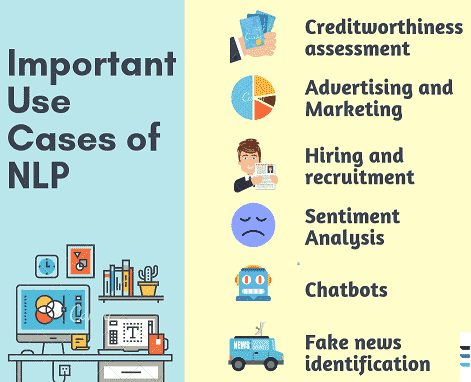

# **Description**

**This is a starter notebook for NLP in text processing. It covers Data Preprocessing and Feature Engineering in comprehensive details. The code is implemented in popular NLP libraries namely NLTK, SpaCy, and occasionaly TextBlob. Please upvote and share the notebook if you found it helpful in any way. Thank you in advance!.**

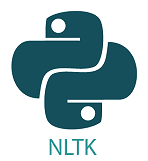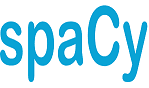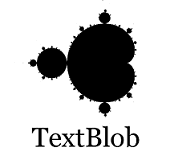

# **Content**

* **ENVIRONMENT SETUP**
    * Install Packages
    * Import Packages
    

* **DATA PREPROCESSING**
    * Data Loading
    * Preliminary Analysis
    * Sentence Tokenization
    * Word Tokenization
    * Stopword Removal
    * Removal of Tags
    * Delimiter Removal
    * Spell Check 
    * Stemming
    * Lemmatization
    
    
* **FEATURE ENGINEERING**
    * Encoding    
    * POS Tagger
    * N-GRAM
    * Bag Of Words
    * TF
    * TF-IDF
    * Dependency Parser
    * Named Entity Recognition
    * Word Embedding
    * Sentiment Analysis
    * Subjectivity Detection

# **ENVIRONMENT SETUP**

# **Install Packages**

In [ ]:
pip install autocorrect

<div class = "alert alert-success" style='color:black'> 🌟 SpaCy Version 3.0! </div>

In [ ]:
pip install spacy==3.0.5

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
pip install spacytextblob

# **Import Packages**

In [ ]:
import warnings
import numpy as np 
import pandas as pd 
import os
import re
import nltk
from nltk.corpus import abc
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import *
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
from autocorrect import Speller
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.models.word2vec import Text8Corpus
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **DATA PREPROCESSING**

# **Data Loading**

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
print('Total number of entries in the train dataset are:', len(data))
data.head()

# **Preliminary Analysis**

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

In [ ]:
data.isna()

In [ ]:
data = data[['id', 'text']]
data

In [ ]:
text = data['text']
text

# **Sentence Tokenization**

For any corpus, we first divide a huge entity into smaller entities so that they can be treated individually. Tokenization also does a similar task but upon sentences in text. First, the text is broken down into sentences and that is further broken down into words. The input is given as text or a corpus. The output generates a list of sentences. For example, in the text, "I love dogs. I have a dog", the output is ["I love dogs,” I have a dog”]

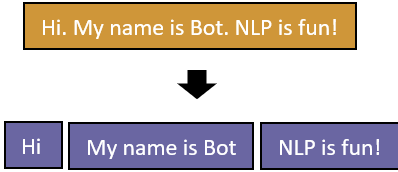

In [ ]:
sents1 = sent_tokenize(text[1000])
print(f'Sentence Tokenization using NLTK: \n {text[1000]} => {sents1}')

# **Word Tokenization**

Word tokenization is the same as sentence tokenization. But, rather than applying it to
sentences, it is used on words so that individual words are separated as items in a
list. For example, in the sentence, "Chennai is humid,” the result is ["Chennai,” “is,”
“humid”].

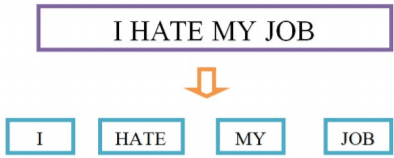

In [ ]:
words1 = word_tokenize(sents1[0])
print(f'Word Tokenization using NLTK: \n {sents1[0]} => {words1}')

In [ ]:
sp = spacy.load('en_core_web_sm')

In [ ]:
print(f'Word Tokenization using SpaCy: \n\n{sp(text[0])} =>\n')

words2 = sp(text[0])
for word in words2:
    print(word)

# **Stopword Removal**

The dataset may contain words like ‘after,’ ‘every’ and ‘I.’ These words are not relevant to important NLP applications like the sentiment detection process. Thereby, these words can be deleted to minimize the burden on the system.

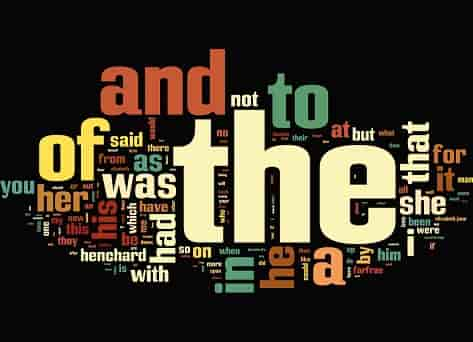

In [ ]:
nltk.download('stopwords')

In [ ]:
tokens1 = [word for word in words1 if not word in stopwords.words('english')] 
print(f'Stopword Removal using NLTK: \n{words1} => {tokens1}')

In [ ]:
spacy_stopwords = sp.Defaults.stop_words
print(f'SpaCy Stopwords: \n{spacy_stopwords}')

In [ ]:
tokens2 = [word for word in words2 if word not in spacy_stopwords] 
print(f'Stopword Removal using SpaCy: \n{words2} => {tokens2}')

# **Delimiter Removal**

Delimiters are removed to reduce the size of the dataset as they do not supply any vital information in some cases. A Few delimiters are question marks (?), full stops (.), and exclamation marks (!). For example, after delimiter removal the sentence 'I am cold!' becomes 'I am cold'. 

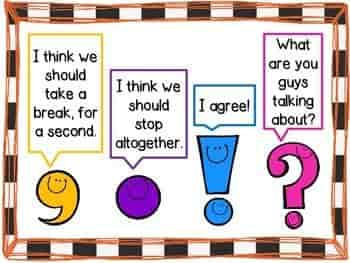

In [ ]:
from string import punctuation
print(f'Delimiters in English: \n{punctuation}')

In [ ]:
tokens1 = [word for word in words1 if word not in punctuation]
print(f'Delimiter Removal: \n{words1} => {tokens1}')

# **Removal of Tags**

During web scraping, the data is scraped from web pages residing on the website, and they contain HTML tags. These tags do not provide any necessary information and hence, can be erased. For example, a tag like < body > (Body Tag) is deleted.

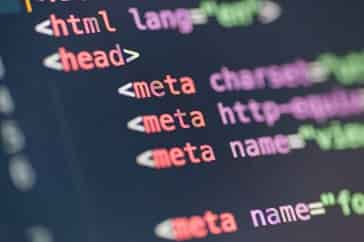

In [ ]:
sent_with_html = "<head> <title> Natural Language Processing </title> </head>"
remove_html = re.compile('<.*?>')

print(f"Removing HTML tags: \n{sent_with_html} => {re.sub(remove_html, '', sent_with_html).strip()}")

# **Spell Check**

While communicating online, people use shorthand, urban dictionary words, and slang in their language. Standard dictionaries do not hold these words, so lookups into these dictionaries lead to inconsistency in data. Therefore it is essential to correct spelling.

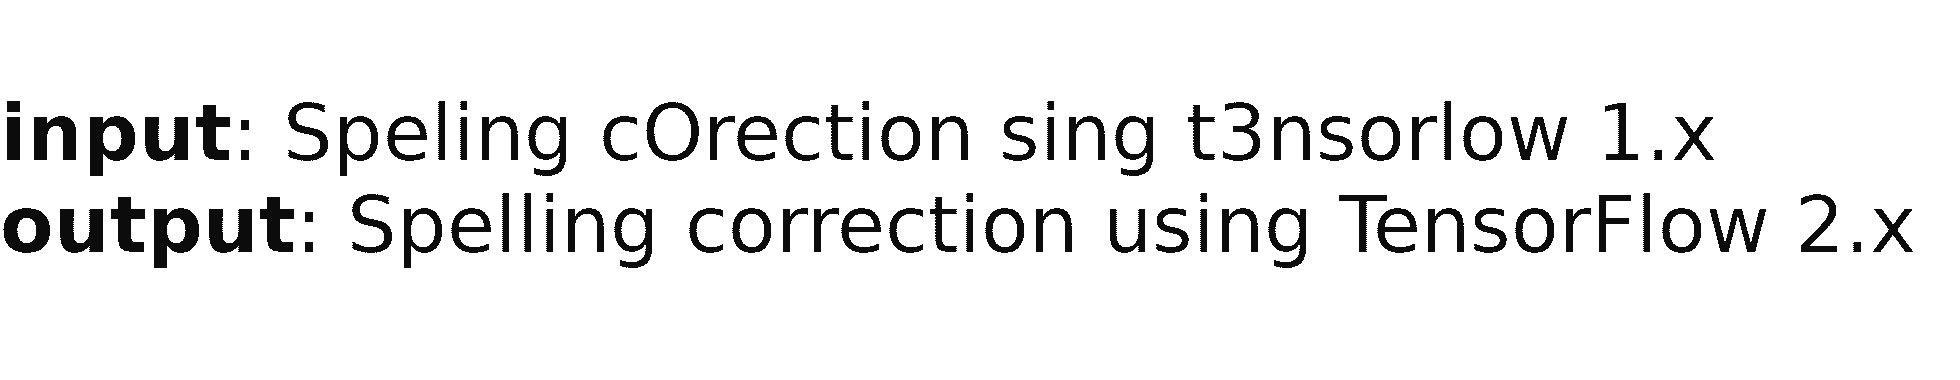

In [ ]:
spell = Speller()

print('Spelling Correction:\n')
for token in tokens1:
    print(f'{token} => {spell(token)}')


In [ ]:
spell = Speller()
misspelled = ['Calandar', 'neccessary', 'recieve', 'adress', 'misteak']

print('Tokens before and after Spelling Correction (Own Example):\n')
for token in misspelled:
    print(f'{token} : {spell(token)}')


# **Stemming**

Stemming applies algorithmic rules to extract the stem out of the derived word simply. The words produced by this step do not have any essential meaning, but they are simply a bunch of letters put together without affixes. For example, the word “beautiful” is stemmed to “Beauti”.

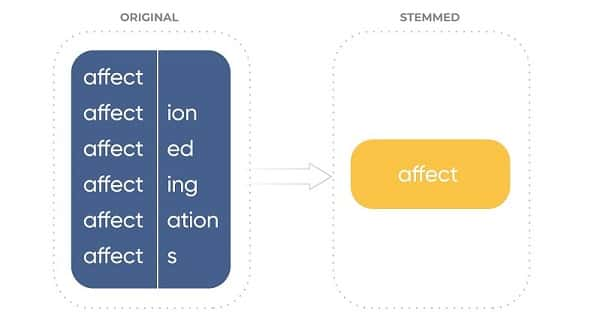

In [ ]:
porterStemmer = PorterStemmer()
stemWords1 = [porterStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Porter Stemmer: \n{stemWords1}')

In [ ]:
snowballStemmer = SnowballStemmer('english')
stemWords2 = [snowballStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Snowball Stemmer: \n{stemWords2}')

# **Lemmatization**

Lemmatization is similar to stemming but it add context to bring out the true meaning. It groups inflected forms of words to be interpretd as a single root word. For example, the word “beautiful” is stemmed to “Beauty” unlike “Beauti”.

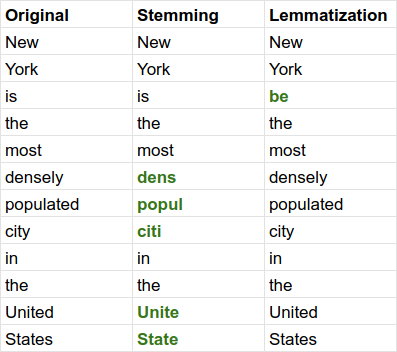

In [ ]:
wordNetLemmatizer = WordNetLemmatizer()
lemmaWords1 = [wordNetLemmatizer.lemmatize(word) for word in tokens1]

print(f'Tokens after Lemmatization using WordNet Lemmatizer: \n{tokens1} => {lemmaWords1}')

In [ ]:
lemmaWords2 = [word.lemma_ for word in tokens2]

print(f'Tokens after Lemmatization using SpaCy Lemmatization: \n{tokens2} => {lemmaWords2}')

# **FEATURE ENGINEERING**

# **Encoding**

Encoding is the process of encrypting data in a format that computers can understand. Humans comprehend natural language. However, a machine is capable of decoding only 0s and 1s. Encoding converts text to digits. For example, the words 'positive' and 'negative' are mapped to the numbers '0' and '1'.

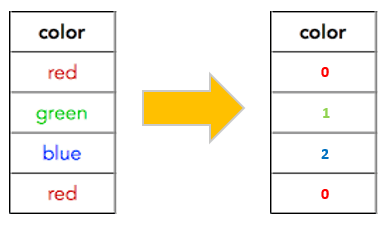

In [ ]:
animals = ['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog']

label_encoder = preprocessing.LabelEncoder()
data = pd.DataFrame({'Labels' : animals, 'Label Encoder Values' : label_encoder.fit_transform(animals)})

print("Label Encoder")
data.style.background_gradient(cmap = 'BrBG')

In [ ]:
animals = np.array(['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog'])

ohe = preprocessing.OneHotEncoder()
result = ohe.fit_transform(animals.reshape(-1,1)).toarray()

data = pd.DataFrame(result.astype(int))
data['Labels'] = animals

print("One Hot Encoder")
data.style.background_gradient(cmap = 'Wistia')

# **POS Tagger**

POS tagger is parts of speech tagger that is an in-built function found in a standard library. It tags the words in the sentences according to the grammar of the langauge. For example, in the text, “The pizza was disgusting but the location was beautiful”, the result after implementing POS tagger will be [“The [DT]”, “pizza [NN]”, “is [VB]”, “disgusting [VBG]”, “but [CC]”, “the [DT]”, “location [NN]”, “was [VBD], “beautiful [JJ]].

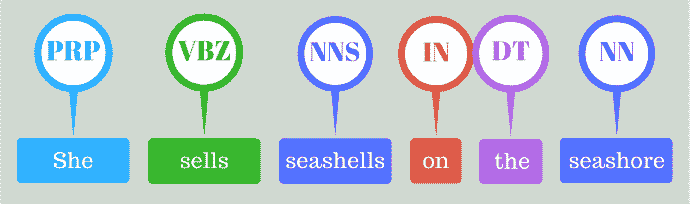

In [ ]:
tagged_tokens1 = nltk.pos_tag(tokens1)

print(f'POS tagging using NLTK: \n{tokens1} => {tagged_tokens1}')

In [ ]:
tagged_tokens2 = [word.pos_ for word in tokens2]

print('POS tagging using SpaCy: \n')
for i in range(len(tagged_tokens2)):
    print(f'{tokens2[i]} : {tagged_tokens2[i]}')

# **N-Gram**

N-gram is a language model widely used in NLP and is applied to statistical problems involving text and audio. It is a probabilistic model that predicts the next series of words. For example, in the sentence, “The movie was boring.” Unigram processes the text as [“The”, “movie”, “was”, “boring”]. Bi-gram processes the text as [“The movie”, “movie was”, “was boring”]. Tri-gram processes the text as [“The movie was”, “movie was boring”]

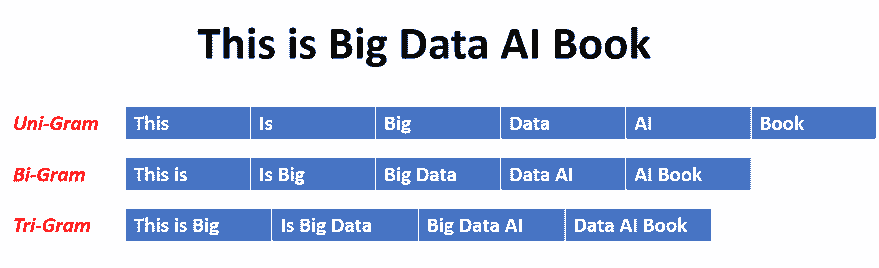

In [ ]:
n_grams1 = ngrams(tokens1, 2)
n_grams1 = [ ' '.join(grams) for grams in n_grams1]

print(f'N-Gram using NLTK (n = 2): \n{tokens1} => {n_grams1}')

In [ ]:
n_gram_finder = nltk.collocations.TrigramCollocationFinder.from_words(tokens1)

print(f'Most Common N-Gram Finder using NLTK (n = 3): \n{tokens1} => {n_gram_finder.ngram_fd.most_common(2)}')

# **Bag of Words**

The bag of words carries out sentence tokenization and word tokenization. After that, it counts the number of appearances of each word. For example, in a sentence, “It is nice but horrid, and that’s not a nice thing.” The word “nice” is extracted and countered with two occurrences.

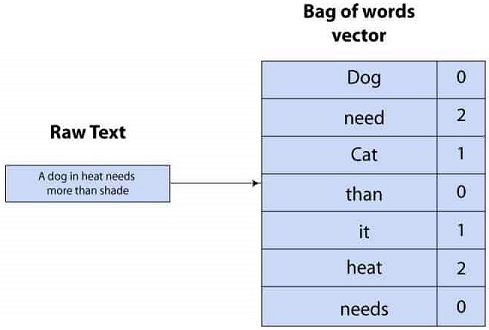

In [ ]:
word_count = {}

for word in tokens1:
    
    if word not in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1
        
print(f'Bag of Words: \n{tokens1} => {word_count}')

In [ ]:
stopwords = set(STOPWORDS)

wc = WordCloud(width = 900, height = 500, background_color = 'white', random_state = 10).generate(text[1])

plt.title('Word Cloud for Bag Of Words')
plt.imshow(wc)
plt.axis('off')
plt.show()

# **Term Frequency**

TF – Term Frequency is described as the number of times that a term occurs in a document. It considers all the terms of equal importance. For example, the word “Fruit” appears five times in a document of 100 words, then the TF for “Fruit” is 5/100 = 0.05.

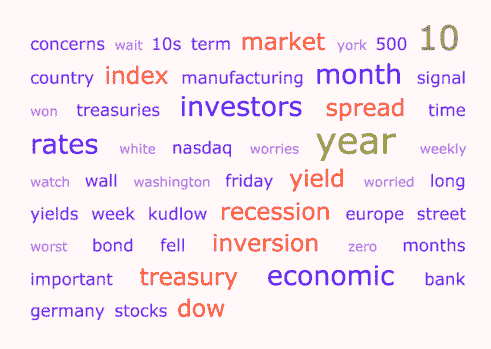

In [ ]:
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [ ]:
count_vectorizer = CountVectorizer()
text_list = list(text[0:10])

tf = count_vectorizer.fit_transform(text_list)

tf_feature_names = count_vectorizer.get_feature_names()

print('Term Frequency of Document')
df = pd.DataFrame(tf.toarray(), columns = tf_feature_names) / len(tf_feature_names)
df.style.set_caption("Term Frequency of Document")
df.style.applymap(color)

# **Term Frequency - Inverse Document Frequency**

TF-IDF – Term Frequency-Inverse Document Frequency is described as the importance of a word in a document, which is proportional to the number of times the word appears in the document. For example, the word “Fruit” appears in 100 of 10000 documents and the term frequency is 5 then the TF-IDF is 0.05 * log(10000/100) = 5 * 2 = 10.

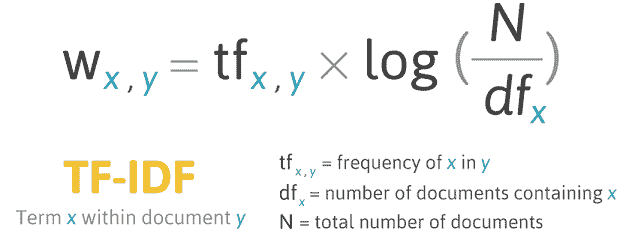

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
text_list = list(text[0:10])

tfidf = tfidf_vectorizer.fit_transform(text_list)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

print('Term Frequency - Inverse Document Frequency of Document')
df = pd.DataFrame(tfidf.toarray(), columns = tfidf_feature_names)
df.style.set_caption("Term Frequency - Inverse Document Frequency of Document")
df.style.applymap(color)

# **Dependency Parser**

Stanford dependency parser establishes the relationship between entities in the language using grammatical rules. The output of the parser is a tree structure that is annotated. For example, in the sentence “The funny boy joked,” “funny” is an adjective for the noun “boy.”

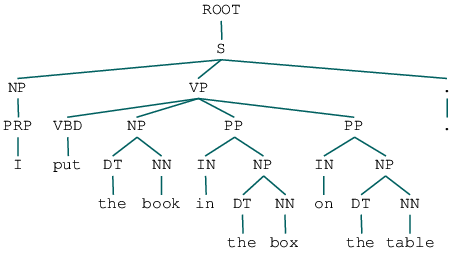

In [ ]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

parser = nltk.RegexpParser(grammar)
parse_tree = parser.parse(tagged_tokens1)

print(f'Dependency Parse Tree using NLTK: \n\n{sents1[0]} => \n\n{parse_tree}')

In [ ]:
print('Dependency Parse Tree using SpaCy')

displacy.render(sp(text[1000]), style = "dep", jupyter = True, options = {"distance" : 100})

# **Named Entity Recognition**

NER - Named Entity Recognition is the process of extracting proper nouns or proper noun phrases. For example, in the sentence 'Robert is interested in Amazon', the entities 'Robert' (Name) and 'Amazon' (Organization) are selected.

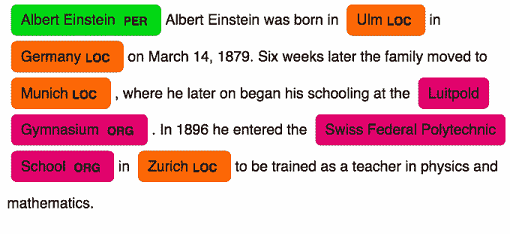

In [ ]:
ner_chunk = nltk.ne_chunk(tagged_tokens1)

print(f'Named Entity Recognition using NLTK: \n\n{sents1[0]} =>\n')

for x in str(ner_chunk).split('\n'):
    if '/NN' in x:
        print(x)

In [ ]:
ner_sent = sp(text[1])

print(f'Named Entity Recognition using SpaCy: \n\n{ner_sent} =>\n')

for ent in ner_sent.ents:
    print(ent.text, '-', ent.label_)

In [ ]:
print('Named Entity Recognition Visualization using SpaCy')
displacy.render(ner_sent, style = 'ent', jupyter = True)

# **Word Embedding**

Word embedding is the process of converting text into numerical data. Since computers work on only numbers and cannot accurately compute data in the form of strings, words are embedded into a unique integer or numerical code. For example, the word “Severe” is fixed as a number “3214”.

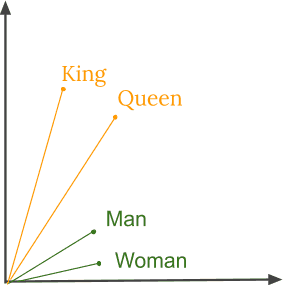

In [ ]:
warnings.filterwarnings('ignore')

word2vec = gensim.models.Word2Vec(abc.sents())
embedding1 = word2vec.most_similar(tokens1[-1])
vector1 = word2vec[tokens1[-1]]

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {vector1}')

<div class="alert alert-info" style = 'color:black'>
  🤩 Visualizing Word Embedding with Word2Vec using PCA! </div>

In [ ]:
pca = PCA(n_components = 2)

X = word2vec[word2vec.wv.vocab]
X = X[ : 10, : ]

result = pca.fit_transform(X)
words = list(word2vec.wv.vocab)
words = words[ : 10]

plt.figure(figsize = (15, 20))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

<div class = "alert alert-info" style = 'color:black'> 🔦 For Word Embedding using GloVe, the embedding representation 'glove.6B.100d.txt' is used! </div>

In [ ]:
input_file = '../input/glove6b/glove.6B.100d.txt'
output_file = '../glove.6B.100d.txt.word2vec'

glove2word2vec(input_file, output_file)

model = KeyedVectors.load_word2vec_format(output_file, binary = False)
result = model.most_similar(positive = ['king', 'woman'], negative = ['man'], topn = 1)

print(f'Word Embedding using GloVe: \n{result}')

# **Sentiment Analysis**

Sentimental analysis plays a significant role in determining the polarity of a review or a comment. It is used to know whether the person is talking about something in a positive way or a negative way. It can be classified broadly into positive, negative, and neutral. For example, on a tourism website, a person leaves a remark stating, “There are beautiful tourist spots in Switzerland. “The word ‘beautiful’ is positive as it describes Switzerland as pretty.

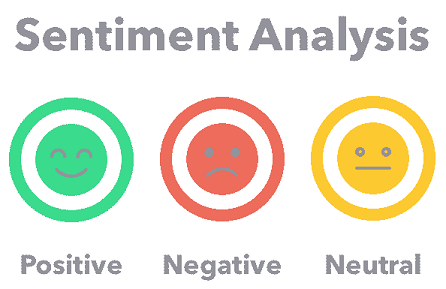

In [ ]:
sia = SentimentIntensityAnalyzer()
polarity_scores1 = sia.polarity_scores(text[10])

print(f"Sentiment Analysis using NLTK: \n{text[10]} => {polarity_scores1}")

In [ ]:
x = np.array([[sia.polarity_scores(word)['compound'] for word in word_tokenize(text[10])]])
annot = np.array([word_tokenize(text[10])])

plt.figure(figsize = (10, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Sentiment Analysis')
plt.show()

# **Subjectivity Detection**

Subjectivity Detection relies upon the answer to the question "Is it based on facts or opinions?". For example, the sentence 'I love cats' is subjective and the sentence 'Cats have tails' is objective.

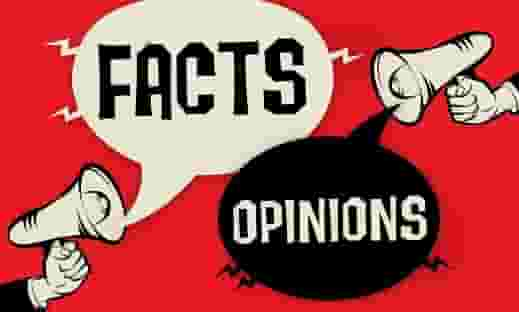

In [ ]:
sp.add_pipe('spacytextblob')
senti_sent = sp(text[20])

print(f"SpaCy using TextBlob: \n\n{text[20]} =>\n")
print(f"Sentiment Analysis: {senti_sent._.polarity}")
print(f"Sentiment Subjectivity: {senti_sent._.subjectivity}")
print(f"Sentiment Assessment: {senti_sent._.assessments}")


In [ ]:
sub = sp(text[20])
x = np.array([[word._.subjectivity for word in sub]])
annot = np.array([word_tokenize(text[20])[ : -1]])

plt.figure(figsize = (6, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Subjectivity Detection')
plt.show()